In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import swifter
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.stats import spearmanr

In [23]:
df = pd.read_csv("ChatGPT_Reviews_Cleaned.csv", usecols=lambda column: column != 'Unnamed: 0')

In [28]:
df["Review"] = df["Review"].astype(str)

In [29]:
df['Review_Length'] = df['Review'].apply(len)
df['Word_Count'] = df['Review'].apply(lambda x: len(x.split()))

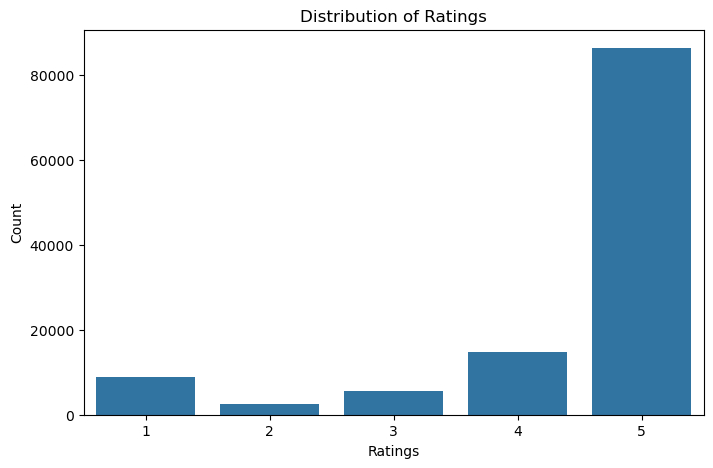

In [36]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Ratings'])
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [39]:
df.describe()

,Ratings,Review_Length,Word_Count
count,118047.000000,118047.000000,118047.000000
mean,4.419316,46.723644,7.659636
std,1.164754,59.792413,9.291604
min,1.000000,1.000000,1.000000
25%,4.000000,13.000000,2.000000
50%,5.000000,27.000000,5.000000
75%,5.000000,55.000000,9.000000
max,5.000000,3038.000000,571.000000


In [54]:
review_length_99th = df['Review_Length'].quantile(0.95)
word_count_99th = df['Word_Count'].quantile(0.95)

# Filter the DataFrame to remove outliers
df_filtered = df[(df['Review_Length'] <= review_length_99th) & (df['Word_Count'] <= word_count_99th)]

In [56]:
df_filtered.describe()

,Ratings,Review_Length,Word_Count
count,111886.000000,111886.000000,111886.000000
mean,4.447518,35.873425,6.017232
std,1.138712,31.927727,5.109047
min,1.000000,1.000000,1.000000
25%,4.000000,13.000000,2.000000
50%,5.000000,25.000000,4.000000
75%,5.000000,48.000000,8.000000
max,5.000000,162.000000,26.000000


Text(0, 0.5, 'Review Length')

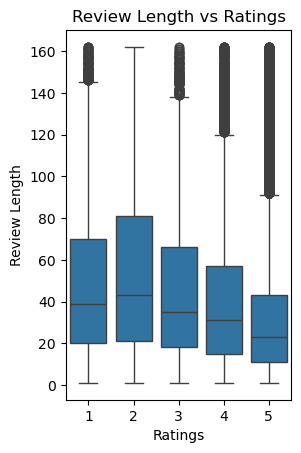

In [46]:
plt.subplot(1, 2, 1)
sns.boxplot(x='Ratings', y='Review_Length', data=df_filtered)
plt.title('Review Length vs Ratings')
plt.xlabel('Ratings')
plt.ylabel('Review Length')

Text(0, 0.5, 'Word Count')

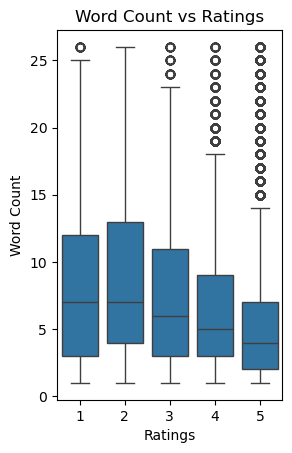

In [55]:
plt.subplot(1, 2, 2)
sns.boxplot(x='Ratings', y='Word_Count', data=df_filtered)
plt.title('Word Count vs Ratings')
plt.xlabel('Ratings')
plt.ylabel('Word Count')

In [64]:
def get_most_frequent_words(df, rating):
    # Filter reviews with the current rating
    reviews = df[df['Ratings'] == rating]['Review']
    
    # Fit the vectorizer on these reviews
    X = vectorizer.fit_transform(reviews)
    
    # Get the word counts
    word_count = X.sum(axis=0).A1
    
    # Get the words corresponding to the indices
    words = vectorizer.get_feature_names_out()
    
    # Create a DataFrame with words and their corresponding counts
    word_freq = pd.DataFrame({'Word': words, 'Count': word_count})
    
    # Sort the words by frequency in descending order
    word_freq = word_freq.sort_values(by='Count', ascending=False)
    
    # Return the top 10 most frequent words
    return word_freq.head(10)

# Get the most frequent words for each rating (1 to 5)
most_frequent_words = {}
for i in range(1, 6):
    most_frequent_words[i] = get_most_frequent_words(df, i)

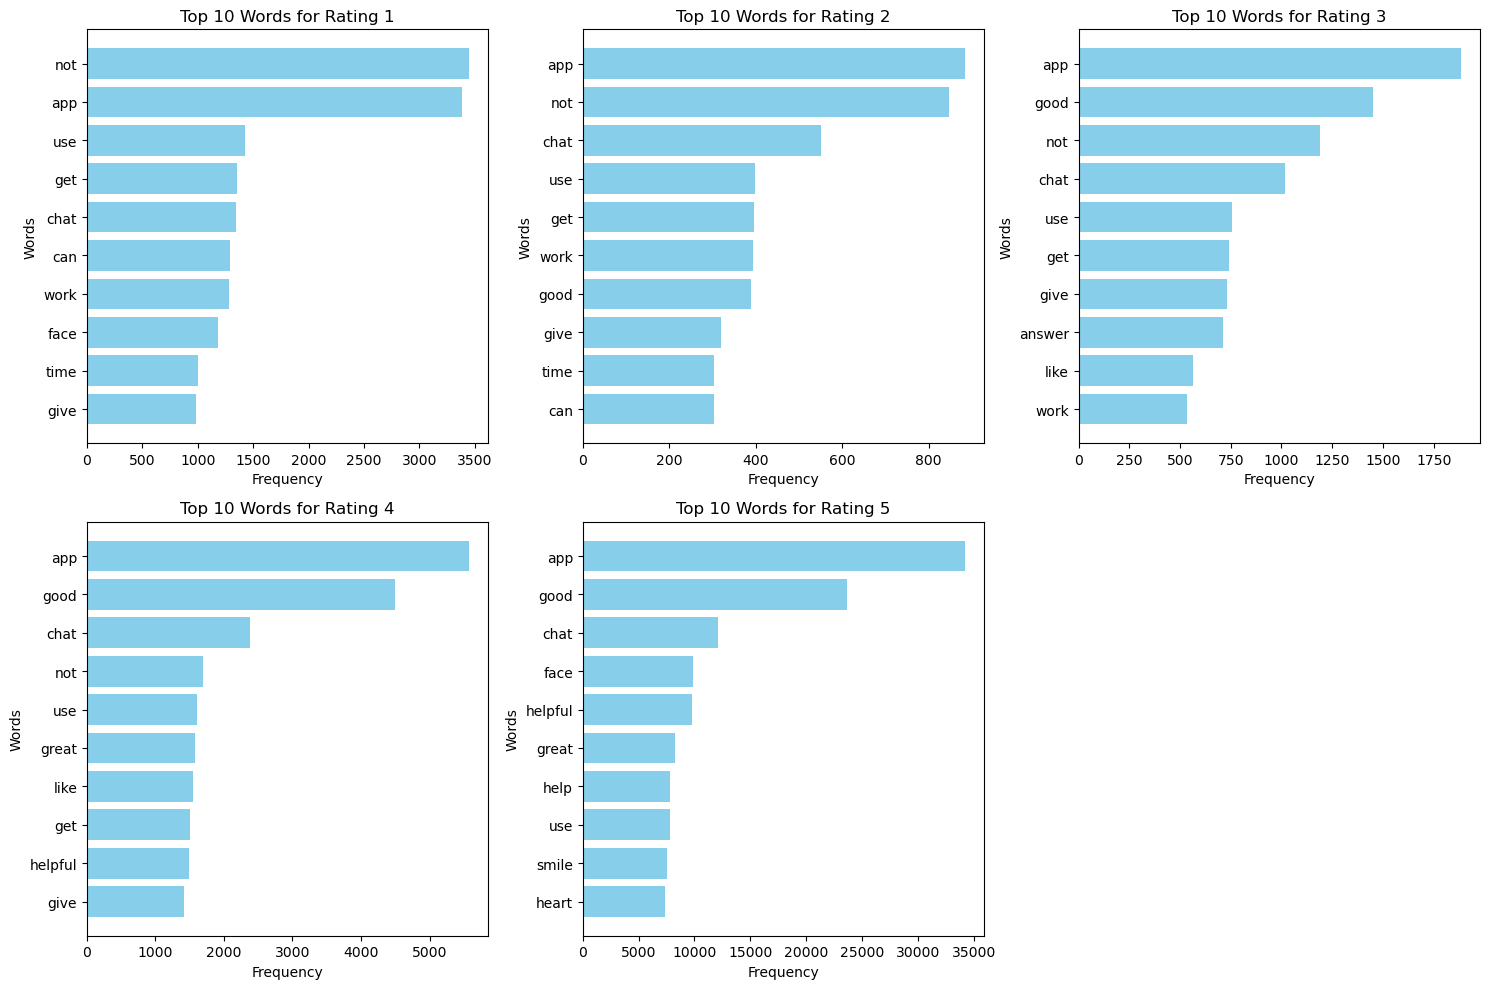

In [63]:
def plot_most_frequent_words(most_frequent_words):
    plt.figure(figsize=(15, 10))
    
    for i in range(1, 6):
        # Extract words and their frequencies
        words = most_frequent_words[i]['Word']
        counts = most_frequent_words[i]['Count']
        
        plt.subplot(2, 3, i)
        plt.barh(words, counts, color='skyblue')
        plt.title(f"Top 10 Words for Rating {i}")
        plt.xlabel('Frequency')
        plt.ylabel('Words')
        plt.gca().invert_yaxis()  # Invert y-axis to have the most frequent words on top
    
    plt.tight_layout()
    plt.show()

# Plot the top 10 most frequent words for each rating
plot_most_frequent_words(most_frequent_words)



In [65]:
# Replace the words "chat" and "app" in the 'Review' column
df['Review'] = df['Review'].str.replace(r'\b(chat|app)\b', '', regex=True, case=False)

# Optionally, trim the spaces that might appear after removal
df['Review'] = df['Review'].str.strip()
df.dropna()

,Review Id,Review,Ratings,Review Date,Review_Length,Word_Count
0,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,great bot accurate anything give tip game stu...,5,8/23/2024 19:20,199,33
1,3c26ee92-4d72-45ee-9242-caab930903ca,love guy,4,8/23/2024 19:14,12,3
2,f293ed19-688a-42e2-8282-ddd077771a94,great,1,8/23/2024 19:12,9,2
3,99af016c-6db2-4f24-9952-cb3bece40be8,impressive,5,8/23/2024 19:11,10,1
4,27dd6ea5-ada3-4795-a297-6faa7d4b6ba2,help code lot great everyone,5,8/23/2024 19:11,28,5
...,...,...,...,...,...,...
118042,02a30a11-e0e0-43cf-a2ce-f524285aaa7c,beat,5,7/25/2023 15:13,4,1
118043,eb95fe69-0b95-4e6c-aa67-a6cb3b93d4f2,office executive,5,2/26/2024 5:38,16,2
118044,469f72f1-5bd0-4c8c-8d27-5de976eb1623,first review,5,7/25/2023 15:09,12,2
118045,a0be489a-f913-4c3d-80cf-c616e8aac151,st installation,5,7/25/2023 15:39,15,2


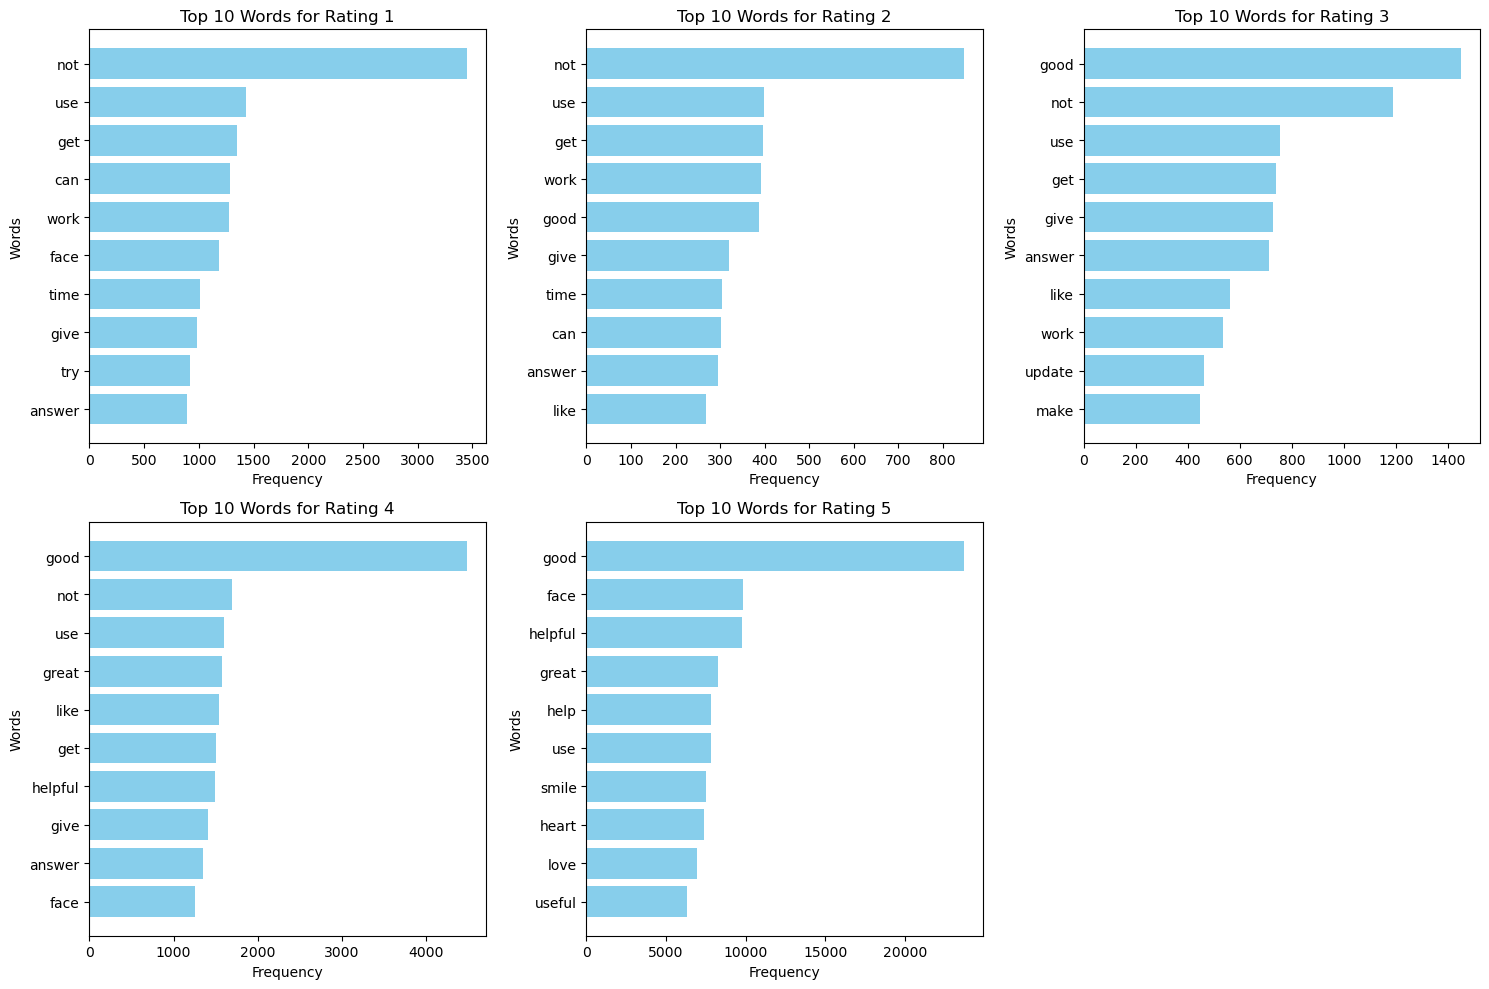

In [66]:
most_frequent_words = {}
for i in range(1, 6):
    most_frequent_words[i] = get_most_frequent_words(df, i)

plot_most_frequent_words(most_frequent_words)

<Figure size 1000x600 with 0 Axes>

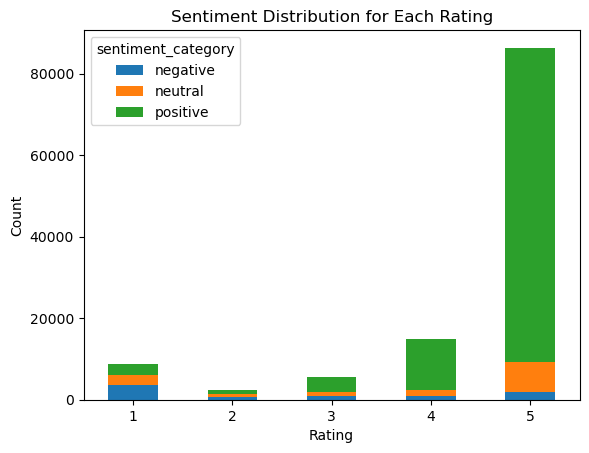

In [74]:
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each review
df['sentiment'] = df['Review'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Categorize sentiment into positive, neutral, and negative
df['sentiment_category'] = pd.cut(df['sentiment'],
                                  bins=[-1, -0.05, 0.05, 1],
                                  labels=['negative', 'neutral', 'positive'])

# Plot sentiment distribution for each rating (1 to 5)
plt.figure(figsize=(10, 6))
df.groupby(['Ratings', 'sentiment_category']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Sentiment Distribution for Each Rating')
plt.ylabel('Count')
plt.xlabel('Rating')
plt.xticks(rotation=0)
plt.show()


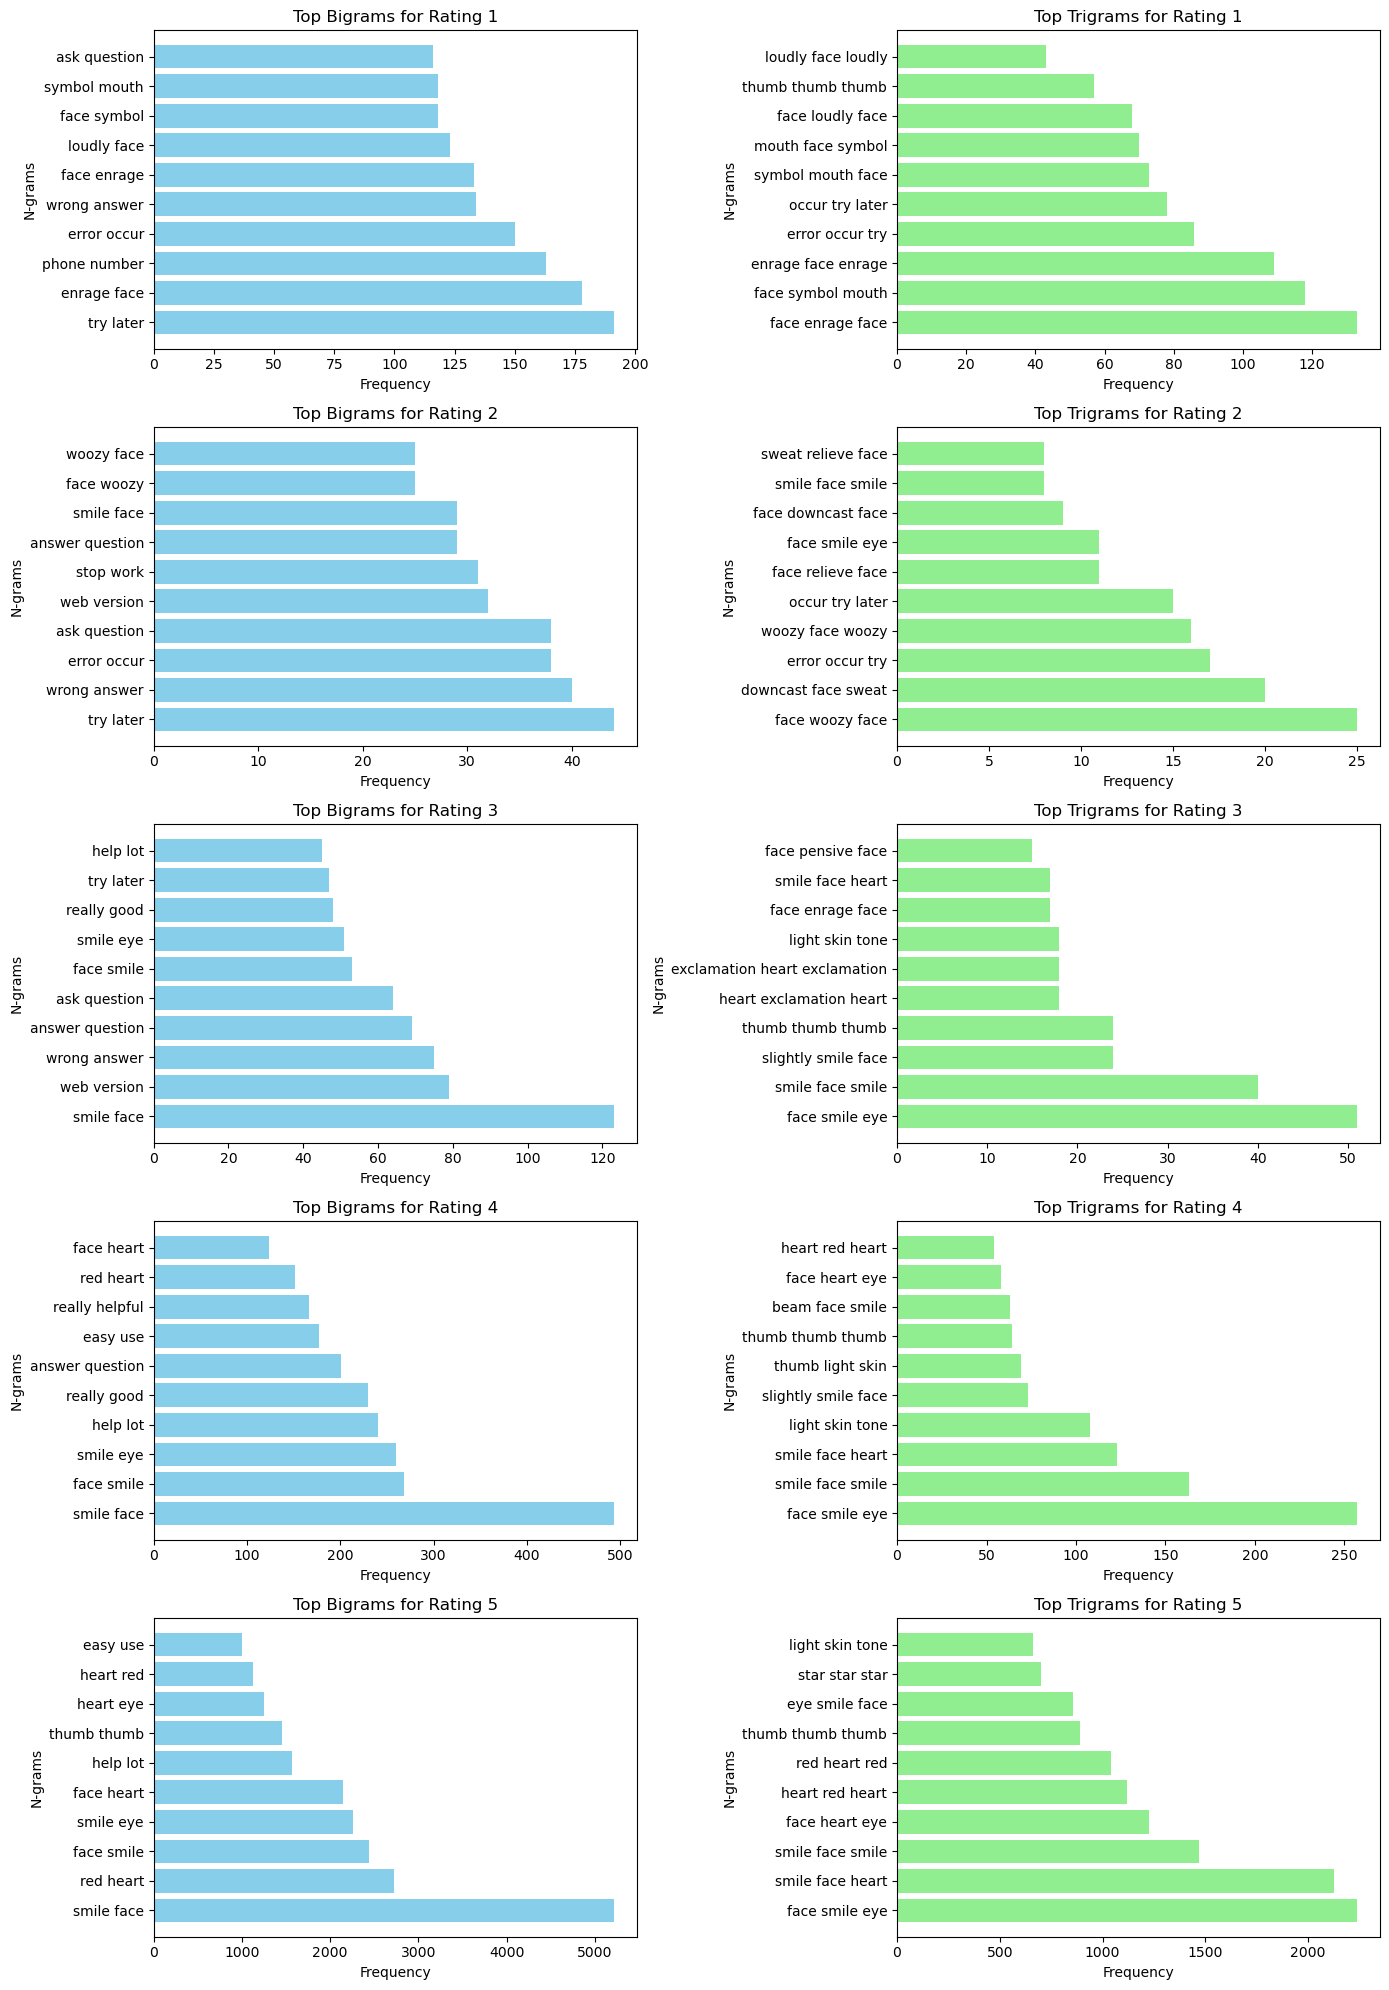

Top Bigrams for Rating 1:
         n-gram  Frequency
8     try later        191
1   enrage face        178
6  phone number        163
2   error occur        150
9  wrong answer        134
3   face enrage        133
5   loudly face        123
4   face symbol        118
7  symbol mouth        118
0  ask question        116
Top Trigrams for Rating 1:
               n-gram  Frequency
2    face enrage face        133
4   face symbol mouth        118
0  enrage face enrage        109
1     error occur try         86
7     occur try later         78
8   symbol mouth face         73
6   mouth face symbol         70
3    face loudly face         68
9   thumb thumb thumb         57
5  loudly face loudly         43


Top Bigrams for Rating 2:
            n-gram  Frequency
6        try later         44
9     wrong answer         40
2      error occur         38
1     ask question         38
7      web version         32
5        stop work         31
0  answer question         29
4       smile face 

In [78]:
def get_top_ngrams(df, rating, ngram_range=(2, 3), top_n=10):
    # Filter data for the specified rating
    reviews = df[df['Ratings'] == rating]['Review']
    
    # Create CountVectorizer for n-grams (bigrams or trigrams)
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english', max_features=top_n)
    X = vectorizer.fit_transform(reviews)
    
    # Get n-grams and their frequency
    ngrams = vectorizer.get_feature_names_out()
    freq = np.asarray(X.sum(axis=0)).flatten()
    
    # Create a DataFrame for the top n-grams
    ngram_df = pd.DataFrame(list(zip(ngrams, freq)), columns=['n-gram', 'Frequency'])
    return ngram_df.sort_values(by='Frequency', ascending=False)

# Get top bigrams and trigrams for ratings 1 to 5
top_ngrams = {}
for rating in range(1, 6):
    top_ngrams[rating] = {
        'Bigrams': get_top_ngrams(df, rating, ngram_range=(2, 2)),
        'Trigrams': get_top_ngrams(df, rating, ngram_range=(3, 3))
    }

# Display top bigrams and trigrams for each rating
fig, axes = plt.subplots(5, 2, figsize=(14, 20))

# Iterate through ratings and plot bigrams and trigrams
for rating in range(1, 6):
    # Bigrams plot
    bigrams = top_ngrams[rating]['Bigrams']
    axes[rating-1, 0].barh(bigrams['n-gram'], bigrams['Frequency'], color='skyblue')
    axes[rating-1, 0].set_title(f"Top Bigrams for Rating {rating}")
    axes[rating-1, 0].set_xlabel("Frequency")
    axes[rating-1, 0].set_ylabel("N-grams")
    
    # Trigrams plot
    trigrams = top_ngrams[rating]['Trigrams']
    axes[rating-1, 1].barh(trigrams['n-gram'], trigrams['Frequency'], color='lightgreen')
    axes[rating-1, 1].set_title(f"Top Trigrams for Rating {rating}")
    axes[rating-1, 1].set_xlabel("Frequency")
    axes[rating-1, 1].set_ylabel("N-grams")

# Adjust layout and display
plt.tight_layout()
plt.show()

# Display tables for top bigrams and trigrams
for rating in range(1, 6):
    print(f"Top Bigrams for Rating {rating}:")
    print(top_ngrams[rating]['Bigrams'])
    print(f"Top Trigrams for Rating {rating}:")
    print(top_ngrams[rating]['Trigrams'])
    print("\n")

In [82]:
min_date = df['Review Date'].min()
max_date = df['Review Date'].max()

print(f"Minimum Review Date: {min_date}")
print(f"Maximum Review Date: {max_date}")

Minimum Review Date: 2023-07-25 15:01:00
Maximum Review Date: 2024-08-23 19:20:00


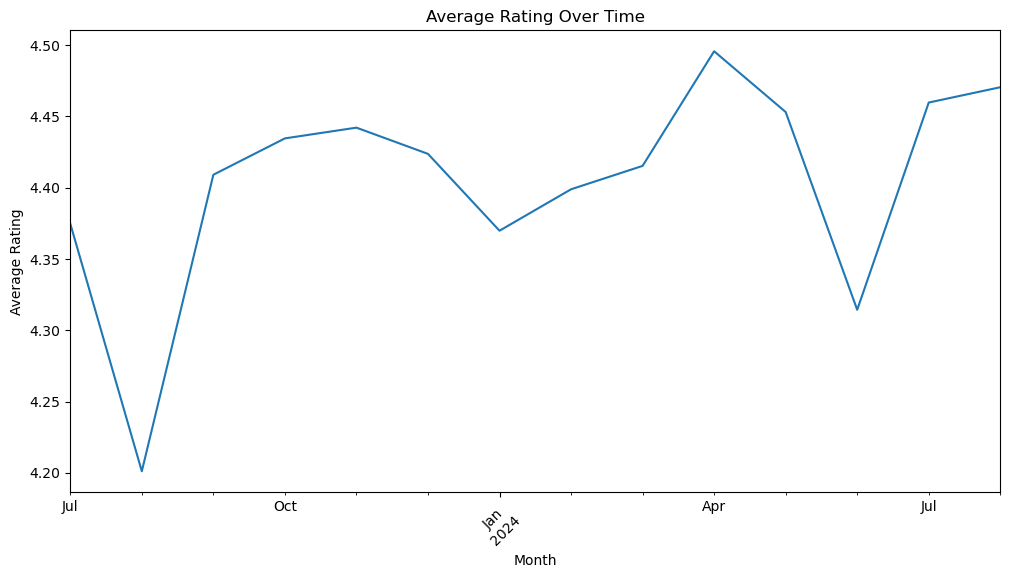

In [92]:
df['Review Date'] = pd.to_datetime(df['Review Date'])

# Group by date (monthly average rating)
df['month'] = df['Review Date'].dt.to_period('M')

# Plot average rating by month
monthly_avg_rating = df.groupby('month')['Ratings'].mean()

plt.figure(figsize=(12, 6))
monthly_avg_rating.plot(kind='line')
plt.title('Average Rating Over Time')
plt.ylabel('Average Rating')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()

In [88]:
def get_top_tfidf(df, rating, top_n=10):
    # Filter data for the specified rating
    reviews = df[df['Ratings'] == rating]['Review']
    
    # Create TfidfVectorizer
    vectorizer = TfidfVectorizer(stop_words='english', max_features=top_n)
    X = vectorizer.fit_transform(reviews)
    
    # Get tf-idf scores and feature names
    tfidf_scores = np.asarray(X.sum(axis=0)).flatten()
    words = vectorizer.get_feature_names_out()
    
    # Create DataFrame for the top TF-IDF words
    tfidf_df = pd.DataFrame(list(zip(words, tfidf_scores)), columns=['Word', 'TF-IDF Score'])
    return tfidf_df.sort_values(by='TF-IDF Score', ascending=False)

# Get top TF-IDF words for ratings 1 to 5
top_tfidf = {}
for rating in range(1, 6):
    top_tfidf[rating] = get_top_tfidf(df, rating)

# Display top TF-IDF words for each rating
for rating in range(1, 6):
    print(f"Top TF-IDF Words for Rating {rating}:")
    print(top_tfidf[rating])
    print("\n")

Top TF-IDF Words for Rating 1:
     Word  TF-IDF Score
8     use    875.205724
9    work    858.304524
6    time    626.899657
1     bad    584.127106
0  answer    567.897096
7     try    534.597233
4    good    515.563682
5     say    514.718349
3    face    462.129822
2   error    455.847790


Top TF-IDF Words for Rating 2:
     Word  TF-IDF Score
3    good    289.907720
9    work    251.705502
8     use    243.701907
5    time    189.994336
0  answer    181.909820
4    like    170.426893
7  update    164.213155
6     try    136.878498
1     ask    129.077604
2    face    111.889590


Top TF-IDF Words for Rating 3:
     Word  TF-IDF Score
2    good   1054.595747
0  answer    482.144699
8     use    473.937427
9    work    358.819854
3    like    353.685223
7  update    304.448917
5    need    300.227715
4    make    293.488994
6    time    285.045024
1    face    241.351588


Top TF-IDF Words for Rating 4:
      Word  TF-IDF Score
2     good   3313.084177
3    great   1237.826182
5  

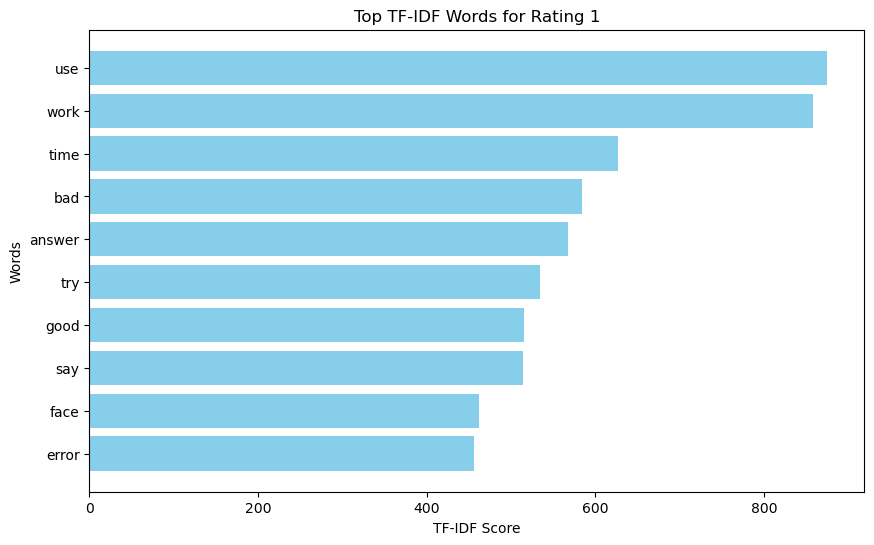

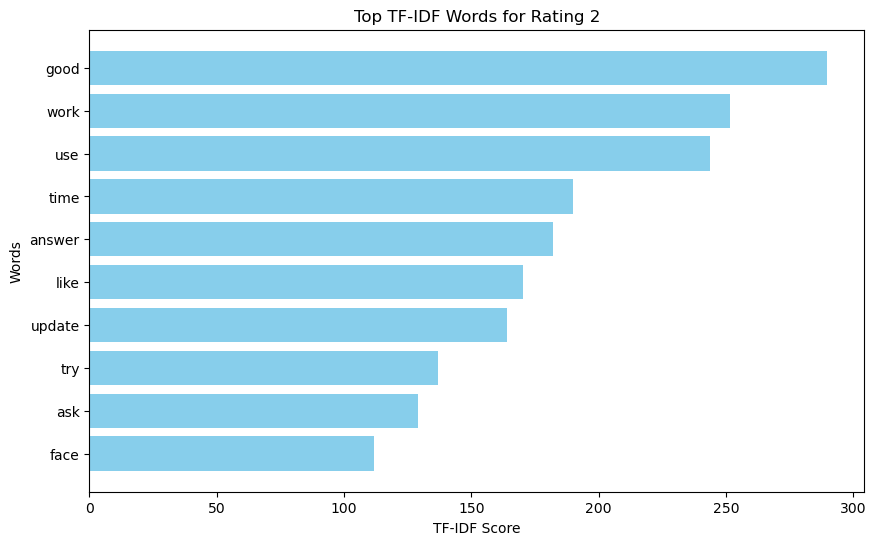

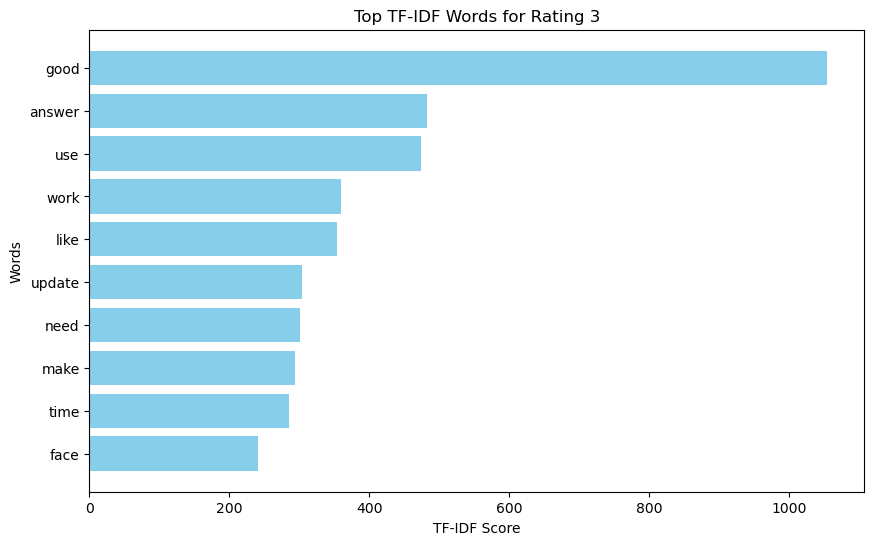

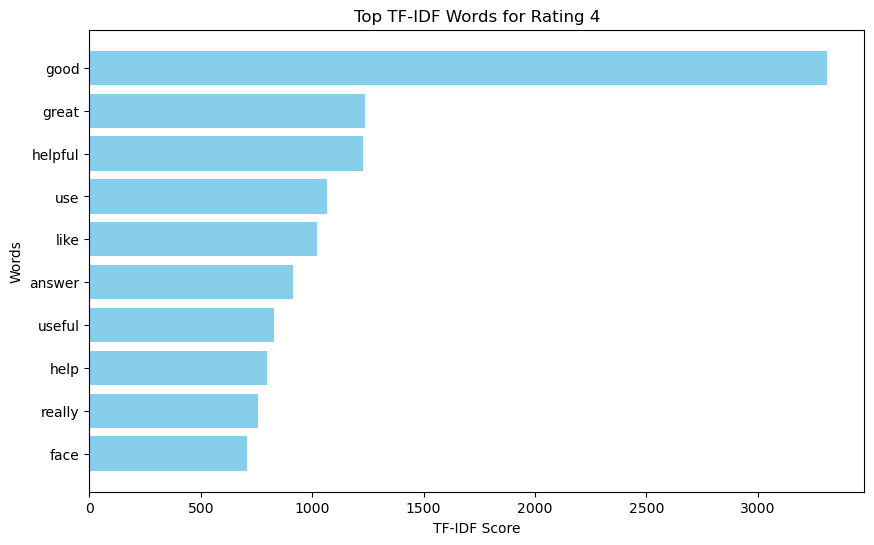

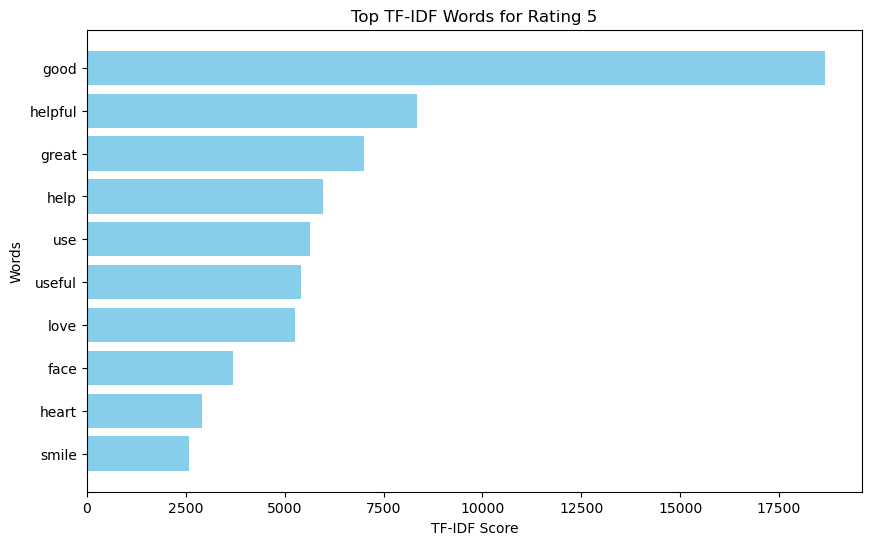

In [89]:
def plot_top_tfidf(top_tfidf):
    for rating in range(1, 6):
        # Extract words and their corresponding TF-IDF scores
        words = top_tfidf[rating]['Word']
        tfidf_scores = top_tfidf[rating]['TF-IDF Score']
        
        # Create a bar plot
        plt.figure(figsize=(10, 6))
        plt.barh(words, tfidf_scores, color='skyblue')
        plt.xlabel('TF-IDF Score')
        plt.ylabel('Words')
        plt.title(f'Top TF-IDF Words for Rating {rating}')
        plt.gca().invert_yaxis()  # To display the highest TF-IDF word at the top
        plt.show()

# Plot the top TF-IDF words for each rating
plot_top_tfidf(top_tfidf)